# Init & parsing


In [1]:
from collections import Counter
from application import *
from pre_processing import Job, Systems, Objects 
import statistics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
jobs = []
jobs.extend(process_files(r'.\input data\1', all_visible_sheets, works_parser.ParserSake))
# jobs.extend(process_files(r'.\input data\АСУ', find_sheets_asu, works_parser.ParserAsu))
# jobs.extend(process_files(r'.\input data\ВОЛС', all_visible_sheets, works_parser.ParserVols))
# jobs.extend(process_files(r'.\input data\Телеканал', find_sheets_vols, works_parser.ParserTk))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskueSake))
# jobs.extend(process_files(r'.\input data\АИИСКУЭ', find_sheets_vols, works_parser.ParserAskue))
# jobs.extend(process_files(r'.\input data\Тех.учет', find_sheets_vols, works_parser.ParserTechReg))

folder: .\input data\1


In [3]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

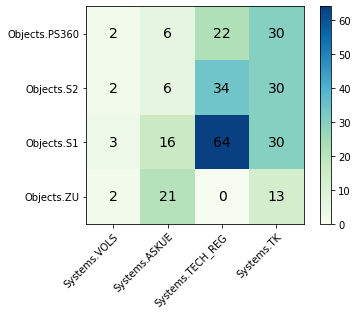

In [4]:
statistics.visualize_statistics(stats)

In [5]:
for (xlabel, ylabel), count in stats.items():
    print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

Systems.VOLS     , Objects.PS360   - 2    
Systems.VOLS     , Objects.S2      - 2    
Systems.VOLS     , Objects.S1      - 3    
Systems.VOLS     , Objects.ZU      - 2    
Systems.ASKUE    , Objects.PS360   - 6    
Systems.TECH_REG , Objects.PS360   - 22   
Systems.TK       , Objects.PS360   - 30   
Systems.ASKUE    , Objects.S2      - 6    
Systems.TECH_REG , Objects.S2      - 34   
Systems.TK       , Objects.S2      - 30   
Systems.ASKUE    , Objects.S1      - 16   
Systems.TECH_REG , Objects.S1      - 64   
Systems.TK       , Objects.S1      - 30   
Systems.ASKUE    , Objects.ZU      - 21   
Systems.TK       , Objects.ZU      - 13   


# Tests

ASU test

In [3]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

NameError: name 'stats' is not defined

VOLS test

In [4]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

NameError: name 'stats' is not defined

TK test

In [5]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

NameError: name 'stats' is not defined

ASKUE test

In [6]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

NameError: name 'stats' is not defined

TECH_REG test

In [38]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0

print('all TECH_REG tests is complete')

all TECH_REG tests is complete


# Sandbox

In [4]:
import pandas as pd
from pre_processing import Systems, Objects

In [5]:
columns = ('date', 'system', 'object', 'place', 'work_type', 'tech_map', 'equip_name', 'performer', )
result = pd.DataFrame(columns=columns,
                      data = ((j.date, j.system, j.object, j.place, j.work_type, 
                               j.tech_map, j.equip_name, j.performer) 
                              for j in jobs))

In [6]:
result.head()

,date,system,object,place,work_type,tech_map,equip_name,performer
0,2020-02-13,Systems.VOLS,Objects.PS360,ПС 110/35/6кВ №360,ТО2,Технологическая операция 4/2/2016,"КТС ВОЛС ВЭ ПС 110/35/6 кВ №360 ""Дамба-1""",Ястребов Алексей Владимирович +79313581975
1,2020-02-20,Systems.VOLS,Objects.PS360,ПС 110/35/6кВ №360,ТО3,Технологическая операция 8/2/2016,"КТС ВОЛС ВЭ ПС 110/35/6 кВ №360 ""Дамба-1""",Ястребов Алексей Владимирович +79313581975
2,2020-02-14,Systems.VOLS,Objects.S2,С2 ПС 110/10кВ,ТО2,Технологическая операция 2/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-2,Ильин Андрей Владимирович +79219303652
3,2020-02-21,Systems.VOLS,Objects.S2,С2 ПС 110/10кВ,ТО3,Технологическая операция 7/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-2,Ястребов Алексей Владимирович +79313581975
4,2020-02-14,Systems.VOLS,Objects.S1,С1 ПС 110/10кВ,ТО2,Технологическая операция 1/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-1,Ильин Андрей Владимирович +79219303652


In [29]:
result[result.isna().any(axis=1)]

,date,system,object,place,work_type,tech_map,equip_name,performer


In [8]:
result[result.system == Systems.VOLS]\
    .drop(['system', 'object', 'performer'], axis=1)\
    .reindex(columns=['date', 'place', 'work_type', 'tech_map'])\
    .sort_values(by=['date', 'place', 'work_type'])\
    .to_excel(r'vols_test.xlsx')

In [7]:
result[result.system == Systems.VOLS]\
    .drop(['system', 'object', 'performer'], axis=1)\
    .reindex(columns=['date', 'place', 'work_type', 'tech_map'])\
    .sort_values(by=['date', 'place', 'work_type'])

,date,place,work_type,tech_map
7,2020-02-12,Здание управления КЗС,ТО2,Технологическая карта 5/2/2016
0,2020-02-13,ПС 110/35/6кВ №360,ТО2,Технологическая операция 4/2/2016
4,2020-02-14,С1 ПС 110/10кВ,ТО2,Технологическая операция 1/2/2016
5,2020-02-14,С1 ПС 110/10кВ,ТО3,Технологическая операция 6/2/2016
2,2020-02-14,С2 ПС 110/10кВ,ТО2,Технологическая операция 2/2/2016
8,2020-02-19,Здание управления КЗС,ТО3,Технологическая карта 9/2/2016
1,2020-02-20,ПС 110/35/6кВ №360,ТО3,Технологическая операция 8/2/2016
6,2020-02-21,ПС Котлин,ТО2,Технологическая операция 3/2/2016
3,2020-02-21,С2 ПС 110/10кВ,ТО3,Технологическая операция 7/2/2016


In [9]:
 result[result.system == Systems.VOLS]

,date,system,object,place,work_type,tech_map,equip_name,performer
0,2020-02-13,Systems.VOLS,Objects.PS360,ПС 360,ТО2,Технологическая операция 4/2/2016,"КТС ВОЛС ВЭ ПС 110/35/6 кВ №360 ""Дамба-1""",Ястребов Алексей Владимирович +79313581975
1,2020-02-20,Systems.VOLS,Objects.PS360,ПС 360,ТО3,Технологическая операция 8/2/2016,"КТС ВОЛС ВЭ ПС 110/35/6 кВ №360 ""Дамба-1""",Ястребов Алексей Владимирович +79313581975
2,2020-02-14,Systems.VOLS,Objects.S2,С2 ПС 110/10кВ,ТО2,Технологическая операция 2/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-2,Ильин Андрей Владимирович +79219303652
3,2020-02-21,Systems.VOLS,Objects.S2,С2 ПС 110/10кВ,ТО3,Технологическая операция 7/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-2,Ястребов Алексей Владимирович +79313581975
4,2020-02-14,Systems.VOLS,Objects.S1,С1,ТО2,Технологическая операция 1/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-1,Ильин Андрей Владимирович +79219303652
5,2020-02-14,Systems.VOLS,Objects.S1,С1,ТО3,Технологическая операция 6/2/2016,КТС ВОЛС ВЭ ПС 110/10 кВ С-1,Ильин Андрей Владимирович +79219303652
6,2020-02-21,Systems.VOLS,Objects.S1,Котлин,ТО2,Технологическая операция 3/2/2016,"ВОК ОПН-ДСП-04-024А06-7,0, ВОК ОПН-ДСП-06-024А...",Ястребов Алексей Владимирович +79313581975
7,2020-02-12,Systems.VOLS,Objects.ZU,Здание управления КЗС,ТО2,Технологическая карта 5/2/2016,"КТС ВОЛС ВЭ ЗУ (помещение №215, 825)",Ястребов Алексей Владимирович +79313581975
8,2020-02-19,Systems.VOLS,Objects.ZU,Здание управления КЗС,ТО3,Технологическая карта 9/2/2016,"КТС ВОЛС ВЭ ЗУ (помещение №215, 825)",Ястребов Алексей Владимирович +79313581975


In [62]:
old = {*process_files(r'.\input data\АСУ', find_sheets_asu, works_parser.ParserAsu)}
len(old)

folder: .\input data\АСУ


247

In [64]:
new = {*process_files(r'.\input data\2', all_visible_sheets, works_parser.ParserSake)}
len(new)

folder: .\input data\2


84

In [1]:
import duty_schedule
import openpyxl
import datetime

wb = openpyxl.load_workbook(r'.\input data\графики дежурств\20.02.xlsx')
schedule = duty_schedule.DutySchedule(wb.worksheets[0], duty_schedule.all_workers)

In [2]:
print('')
schedule.get_performer(duty_schedule.team_s2, datetime.date(2020, 2, 15))

Каприца Анатолий Евгеньевич +79046315018 

## авыавы

